In this notebook I predict 20 stock returns using a Temporal Convolutional Network.
A Temporal convolutional network does not have the same recursive structure as f.ex an RNN. 
It is therefore faster to estimate and can predict many time series in parallel.

The model building part is influenced by a tutorial done by Philippe Rémy:
https://github.com/philipperemy/keras-tcn

For more info on Temporal Convolutional networks see:
https://arxiv.org/pdf/1803.01271.pdf




In [1]:

import glob
import os 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


In [2]:

#Function for predicting from an estimated model
#Function from Philippe Rémy's TCN tutorial

def predict_sequence(input_sequence):
    
    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,ps,1)) # initialize output (ps = time steps)  
    
    for i in range(ps):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[0,-1,0]
        pred_sequence[0,i,0] = last_step_pred
        
        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence, 
        last_step_pred.reshape(-1,1,1)], axis=1)

    return pred_sequence



In [3]:

# The stocks are in 20 different .txt files in a folder named Stock2.
# First we have to read them all in, extract the closing price for each stock and 
# then transform this closing price to returns. That is what is done in this code box.


my_dir='C:\\Users\\badbo\\Desktop\\Projekt_Git\\Stock2'

filesList = []
os.chdir( my_dir )

ret_df = pd.DataFrame(index=range(1520),columns=range(1))

ret_df.columns=['Stocks']


for files in glob.glob("*.txt"):
    fileName, fileExtension = os.path.splitext(files)
    filesList.append(files) 
    
    
for i in filesList:
    data = pd.read_csv(i, sep=",") 
    data['date'] = pd.to_datetime(data['Date']) 
    mask=(data['date'] >= '2010-11-11') & (data['date'] <= '2016-11-25') #The chosen date period
    data=data.loc[mask]
    
    ret=data['Close']
    
    ret=np.array(ret[1:])/np.array(ret[:-1])  #Make closing prices into returns
    
    ret=pd.Series(ret)
    
    ret=ret.to_frame()
    
    
    ret_df=pd.concat([ret_df.reset_index(drop=True),ret.reset_index(drop=True)], axis=1)



In [4]:

ret_df.pop(ret_df.columns[0]) #Remove NaN column from data frame



0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1515    NaN
1516    NaN
1517    NaN
1518    NaN
1519    NaN
Name: Stocks, Length: 1520, dtype: object

In [5]:

#We can now inspect our stock return series
#The 20 stocks return data is stacked columnwise in the data frame ret_df

print(ret_df.shape) #1520 days of return data for 20 stocks
ret_df

(1520, 20)


,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.976868,0.965104,0.983068,1.050648,0.993197,0.993846,0.979451,0.988471,1.015169,0.996079,0.989746,1.002030,0.989291,0.996952,0.984978,0.985733,0.988162,0.999499,0.993278,0.988287
1,0.993290,1.008255,1.009654,0.986737,0.989360,0.997019,1.007798,0.999167,0.989227,1.007391,1.011905,1.000662,1.002804,0.999522,0.993558,0.995090,0.998200,0.999403,1.005707,0.992847
2,0.972335,0.986964,0.982263,0.991117,0.988743,0.978993,0.982560,0.990244,0.989227,0.984406,0.988235,0.986021,0.979146,0.977290,0.987421,0.987297,0.989126,0.986909,0.984744,0.978124
3,0.993236,0.995541,1.009915,1.008131,0.998396,0.996789,0.980062,0.998148,1.000533,0.998735,0.989095,1.006950,1.012285,0.996549,1.003311,1.010890,0.997494,0.997187,0.992946,1.001004
4,1.033864,1.033727,1.023920,1.009714,1.005621,1.014613,1.017665,1.016872,0.997161,1.012217,1.012312,1.021217,1.008274,1.019041,1.011746,1.023723,1.028154,1.011872,1.018917,1.018870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0.955102,1.007002,0.995248,0.988629,0.992715,0.996103,0.998897,1.003640,0.997974,0.996477,0.996015,0.994896,1.004560,1.001120,0.999389,0.986746,1.010396,0.987138,0.998093,1.000572
1516,1.008876,1.004565,1.006069,0.993789,1.008210,1.006543,1.008118,1.014832,1.000883,0.996818,1.004396,1.010993,0.995889,0.991698,1.014629,1.006958,1.055002,1.007810,1.003344,1.014193
1517,1.021180,1.016989,1.007751,1.000821,1.003134,1.010018,0.996843,0.999362,1.014284,0.980403,1.006133,1.000250,1.001634,1.002256,1.008169,0.990363,1.004232,1.001448,1.000857,1.002196
1518,1.005424,1.001512,1.027343,1.005631,0.989050,1.005142,0.932269,0.995849,0.992060,1.002894,1.004194,0.993952,1.003692,1.001955,0.997062,0.999049,1.013925,0.999016,1.010943,1.002766


In [6]:

#Get returns into right shape for input into the TCN-network

rta=ret_df.values.ravel('C')
rta=rta.reshape(20,1520,1,order='F')

nsu=20  #Nr of series used
ps=10   #Prediction steps. We will predict 10 timesteps for each stock.


In [7]:

#Split data into train, test and validation pieces

test=rta[:,-ps:]
t_v=rta[:,:-ps]
train=t_v[:,:-ps]
val=t_v[:,-ps:]

#Reshape train, val and test data for input into the TCN-network

train=train.reshape(nsu,train.shape[1],1)
val=val.reshape(nsu,ps,1)
test=test.reshape(nsu,ps,1)

train=np.concatenate([train, val[:,:-1,:]], axis=1)   


In [8]:
# Build the model

from keras.models import Model,load_model
from keras.layers import Input, Conv1D, Dense, Dropout, Lambda
from keras.optimizers import Adam

# Optimization of the model's hyperparameters is yet to be done

# Convolutional layer parameters
n_filters = 22
filter_width = 32
dilation_rates = [2**i for i in range(10)] 

# The models input shape

history_seq = Input(shape=(None, 1))
x = history_seq

# Specify the models 1D Convolutional layers

for dilation_rate in dilation_rates:
    x = Conv1D(filters=n_filters,
               kernel_size=filter_width, 
               padding='causal',
               dilation_rate=dilation_rate)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(.4)(x)
x = Dense(1)(x)

#Lambda output layer

def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':ps})(x)

model = Model(history_seq, pred_seq_train)

model.summary() #Check model structure


Using TensorFlow backend.
C:\Users\badbo\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\badbo\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\badbo\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\badbo\AppData\Roa

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 22)          726       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 22)          15510     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 22)          15510     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 22)          15510     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 22)          15510     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 22)          1551

In [9]:

batch_size = 2**8
epochs = 150 
model.compile(Adam(), loss='mean_absolute_error')
 
history = model.fit(train, val,
                  batch_size=batch_size,
                  epochs=epochs,verbose=1)




Epoch 1/150
20/20 [==============================] - 3s 168ms/step - loss: 1.0064
Epoch 2/150
20/20 [==============================] - 1s 60ms/step - loss: 0.9951
Epoch 3/150
20/20 [==============================] - 1s 59ms/step - loss: 0.9540
Epoch 4/150
20/20 [==============================] - 1s 59ms/step - loss: 0.7820
Epoch 5/150
20/20 [==============================] - 1s 59ms/step - loss: 0.2366
Epoch 6/150
20/20 [==============================] - 1s 60ms/step - loss: 2.3700
Epoch 7/150
20/20 [==============================] - 1s 60ms/step - loss: 0.5397
Epoch 8/150
20/20 [==============================] - 1s 60ms/step - loss: 0.4361
Epoch 9/150
20/20 [==============================] - 1s 59ms/step - loss: 0.6979
Epoch 10/150
20/20 [==============================] - 1s 62ms/step - loss: 0.7960
Epoch 11/150
20/20 [==============================] - 1s 62ms/step - loss: 0.8344
Epoch 12/150
20/20 [==============================] - 1s 59ms/step - loss: 0.8467
Epoch 13/150
20/20 [===

20/20 [==============================] - 1s 58ms/step - loss: 0.1030
Epoch 99/150
20/20 [==============================] - 1s 61ms/step - loss: 0.0982
Epoch 100/150
20/20 [==============================] - 1s 59ms/step - loss: 0.1016
Epoch 101/150
20/20 [==============================] - 1s 58ms/step - loss: 0.1055
Epoch 102/150
20/20 [==============================] - 1s 59ms/step - loss: 0.1048
Epoch 103/150
20/20 [==============================] - 1s 62ms/step - loss: 0.1070
Epoch 104/150
20/20 [==============================] - 1s 60ms/step - loss: 0.1133
Epoch 105/150
20/20 [==============================] - 1s 58ms/step - loss: 0.1103
Epoch 106/150
20/20 [==============================] - 1s 59ms/step - loss: 0.0976
Epoch 107/150
20/20 [==============================] - 1s 59ms/step - loss: 0.0940
Epoch 108/150
20/20 [==============================] - 1s 58ms/step - loss: 0.0957
Epoch 109/150
20/20 [==============================] - 1s 59ms/step - loss: 0.1078
Epoch 110/150
20/20

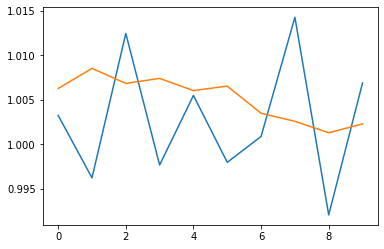

In [23]:

# Plot one of the predictions

i=8 # Stock nr 9
tv=np.append(train[i,:,:],val[i,-1,:])
tv=tv.reshape(1,tv.shape[0],1)
pv=predict_sequence(tv).reshape(ps)

plt.plot(test[i,:,0]) # Real data (test data) in blue
plt.plot(pv) # Predicted values in orange




In [11]:


# Stack all predictions up in a data frame
# for a combined 5x4 plot

rvp=[] #real vs predicted values
for i in range(nsu):
    tv=np.append(train[i,:,:],val[i,-1,:])
    tv=tv.reshape(1,tv.shape[0],1)
    pv=predict_sequence(tv).reshape(ps)
    p1=np.append(test[i,:,0],pv)
    rvp=np.append(rvp,p1)
    

rvp=rvp.reshape(40,10)


Text(0.5, 1.0, '20')

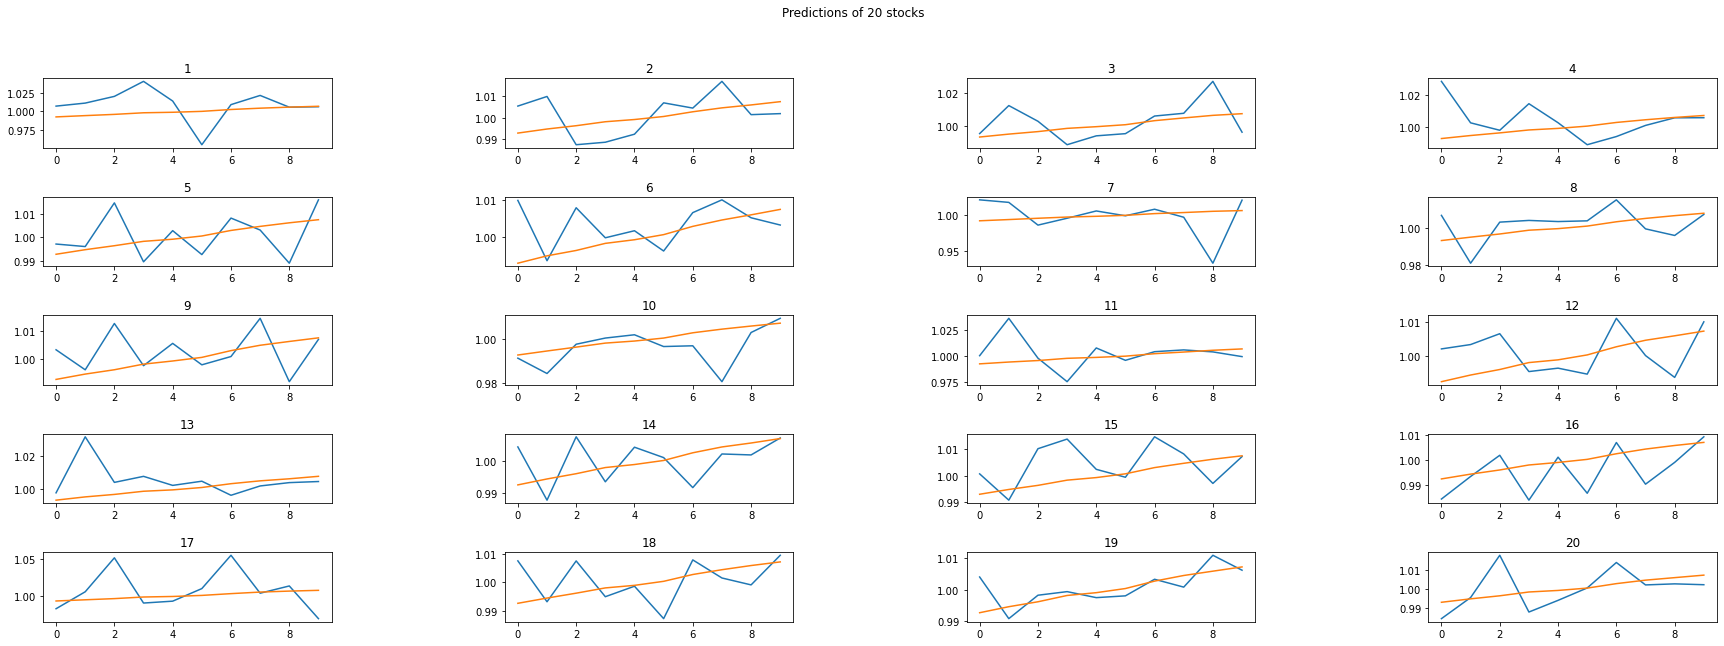

In [12]:
#Plot all predictions in a 5x4 plot

#Real data in blue, predictions in orange

fig, axs = plt.subplots(5, 4,figsize=(30, 10))
fig.suptitle('Predictions of 20 stocks')
plt.subplots_adjust(wspace=0.6,hspace=0.7)

axs[0, 0].plot(rvp[0,:])
axs[0, 0].plot(rvp[1,:])
axs[0, 0].set_title('1')

axs[0, 1].plot(rvp[2,:])
axs[0, 1].plot(rvp[3,:])
axs[0, 1].set_title('2')

axs[0, 2].plot(rvp[4,:])
axs[0, 2].plot(rvp[5,:])
axs[0, 2].set_title('3')

axs[0, 3].plot(rvp[6,:])
axs[0, 3].plot(rvp[7,:])
axs[0, 3].set_title('4')

axs[1, 0].plot(rvp[8,:])
axs[1, 0].plot(rvp[9,:])
axs[1, 0].set_title('5')

axs[1, 1].plot(rvp[10,:])
axs[1, 1].plot(rvp[11,:])
axs[1, 1].set_title('6')

axs[1, 2].plot(rvp[12,:])
axs[1, 2].plot(rvp[13,:])
axs[1, 2].set_title('7')

axs[1, 3].plot(rvp[14,:])
axs[1, 3].plot(rvp[15,:])
axs[1, 3].set_title('8')

axs[2, 0].plot(rvp[16,:])
axs[2, 0].plot(rvp[17,:])
axs[2, 0].set_title('9')

axs[2, 1].plot(rvp[18,:])
axs[2, 1].plot(rvp[19,:])
axs[2, 1].set_title('10')

axs[2, 2].plot(rvp[20,:])
axs[2, 2].plot(rvp[21,:])
axs[2, 2].set_title('11')

axs[2, 3].plot(rvp[22,:])
axs[2, 3].plot(rvp[23,:])
axs[2, 3].set_title('12')

axs[3, 0].plot(rvp[24,:])
axs[3, 0].plot(rvp[25,:])
axs[3, 0].set_title('13')

axs[3, 1].plot(rvp[26,:])
axs[3, 1].plot(rvp[27,:])
axs[3, 1].set_title('14')

axs[3, 2].plot(rvp[28,:])
axs[3, 2].plot(rvp[29,:])
axs[3, 2].set_title('15')

axs[3, 3].plot(rvp[30,:])
axs[3, 3].plot(rvp[31,:])
axs[3, 3].set_title('16')

axs[4, 0].plot(rvp[32,:])
axs[4, 0].plot(rvp[33,:])
axs[4, 0].set_title('17')

axs[4, 1].plot(rvp[34,:])
axs[4, 1].plot(rvp[35,:])
axs[4, 1].set_title('18')

axs[4, 2].plot(rvp[36,:])
axs[4, 2].plot(rvp[37,:])
axs[4, 2].set_title('19')

axs[4, 3].plot(rvp[38,:])
axs[4, 3].plot(rvp[39,:])
axs[4, 3].set_title('20')

There is obviously a lot we can do to improve our predictions. Some suggestions are to use rolling window predictions, optimization of hyperparameters and transformations of the data before feeding it into the model. As the TCN model uses correlation structures between the time series it could also be beneficial to make sure that the stocks in the model are correlated with each other.


Another problem is that the model results are very different depending on random seeds. I therefore saved a model that
I was happy with and in the next box show the results for this model.

Text(0.5, 1.0, '20')

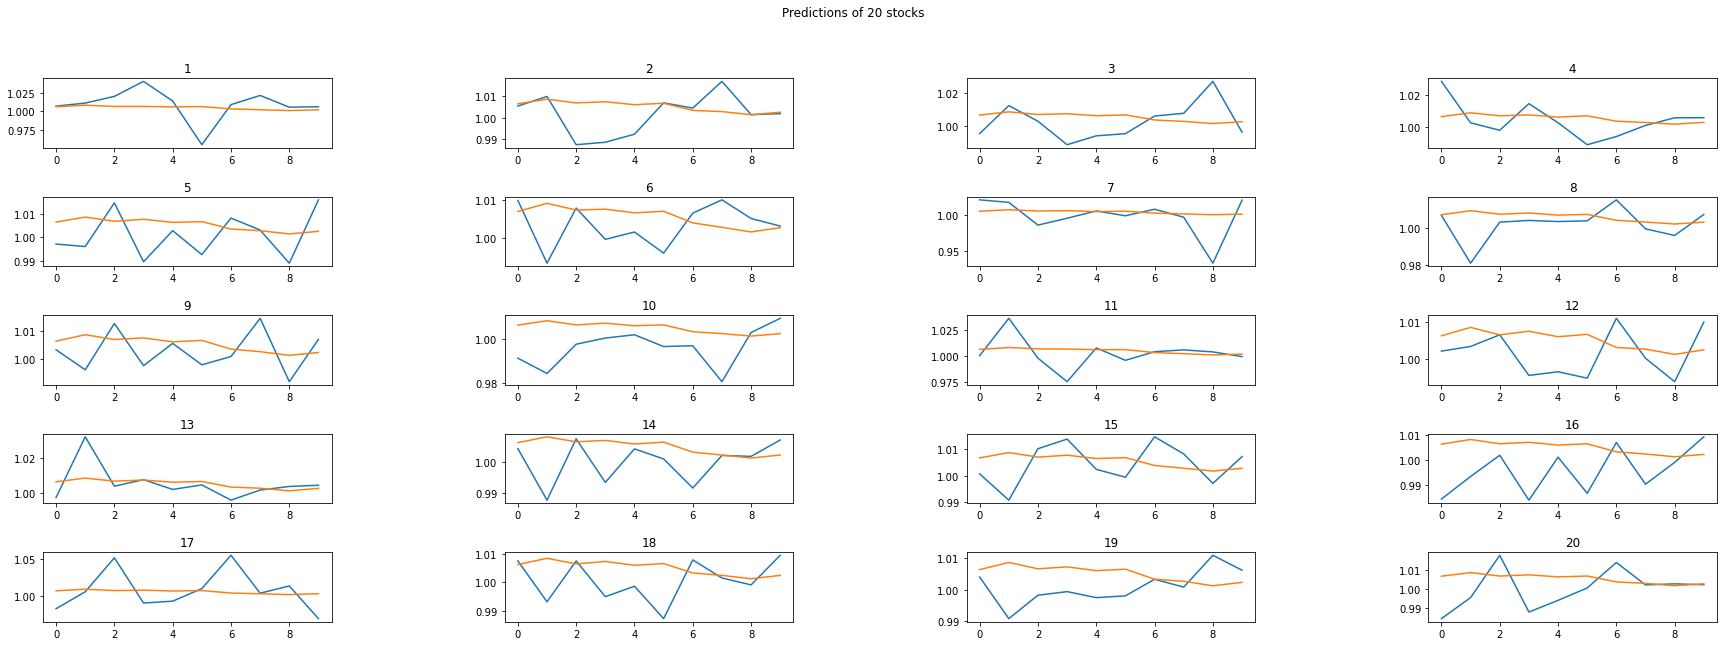

In [13]:

model = load_model("my_model")


# Stack all predictions up in a data frame
# for a combined 5x4 plot

rvp=[]
for i in range(nsu):
    tv=np.append(train[i,:,:],val[i,-1,:])
    tv=tv.reshape(1,tv.shape[0],1)
    pv=predict_sequence(tv).reshape(ps)
    p1=np.append(test[i,:,0],pv)
    rvp=np.append(rvp,p1)
    

rvp=rvp.reshape(40,10)


#Plot all predictions in a 5x4 plot
#Real data in orange predictions in blue

fig, axs = plt.subplots(5, 4,figsize=(30, 10))
fig.suptitle('Predictions of 20 stocks')
plt.subplots_adjust(wspace=0.6,hspace=0.7)

axs[0, 0].plot(rvp[0,:])
axs[0, 0].plot(rvp[1,:])
axs[0, 0].set_title('1')

axs[0, 1].plot(rvp[2,:])
axs[0, 1].plot(rvp[3,:])
axs[0, 1].set_title('2')

axs[0, 2].plot(rvp[4,:])
axs[0, 2].plot(rvp[5,:])
axs[0, 2].set_title('3')

axs[0, 3].plot(rvp[6,:])
axs[0, 3].plot(rvp[7,:])
axs[0, 3].set_title('4')

axs[1, 0].plot(rvp[8,:])
axs[1, 0].plot(rvp[9,:])
axs[1, 0].set_title('5')

axs[1, 1].plot(rvp[10,:])
axs[1, 1].plot(rvp[11,:])
axs[1, 1].set_title('6')

axs[1, 2].plot(rvp[12,:])
axs[1, 2].plot(rvp[13,:])
axs[1, 2].set_title('7')

axs[1, 3].plot(rvp[14,:])
axs[1, 3].plot(rvp[15,:])
axs[1, 3].set_title('8')

axs[2, 0].plot(rvp[16,:])
axs[2, 0].plot(rvp[17,:])
axs[2, 0].set_title('9')

axs[2, 1].plot(rvp[18,:])
axs[2, 1].plot(rvp[19,:])
axs[2, 1].set_title('10')

axs[2, 2].plot(rvp[20,:])
axs[2, 2].plot(rvp[21,:])
axs[2, 2].set_title('11')

axs[2, 3].plot(rvp[22,:])
axs[2, 3].plot(rvp[23,:])
axs[2, 3].set_title('12')

axs[3, 0].plot(rvp[24,:])
axs[3, 0].plot(rvp[25,:])
axs[3, 0].set_title('13')

axs[3, 1].plot(rvp[26,:])
axs[3, 1].plot(rvp[27,:])
axs[3, 1].set_title('14')

axs[3, 2].plot(rvp[28,:])
axs[3, 2].plot(rvp[29,:])
axs[3, 2].set_title('15')

axs[3, 3].plot(rvp[30,:])
axs[3, 3].plot(rvp[31,:])
axs[3, 3].set_title('16')

axs[4, 0].plot(rvp[32,:])
axs[4, 0].plot(rvp[33,:])
axs[4, 0].set_title('17')

axs[4, 1].plot(rvp[34,:])
axs[4, 1].plot(rvp[35,:])
axs[4, 1].set_title('18')

axs[4, 2].plot(rvp[36,:])
axs[4, 2].plot(rvp[37,:])
axs[4, 2].set_title('19')

axs[4, 3].plot(rvp[38,:])
axs[4, 3].plot(rvp[39,:])
axs[4, 3].set_title('20')



#Real data in blue, predictions in orange

